In [5]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


####  Content of this notebook builds on the analysis performed in notebook '2_efficient_frontier_diversification'

This notebook explores in more detail the composition of the Global Minimum Volatility (GMV) portfolio constructed in '2_efficient_frontier_diversification' notebook and how the application of Constant Proportion Portfolio Insurance (CPPI) can affect portfolio returns.

In [6]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

In [4]:
companies = ['UFO.XLON', 'INS.XLON', 'GAW.XLON', 'DSCV.XLON', 'RENE.XLON', 'CHRT.XLON']
risky_returns = fm.compare_returns (companies, raw_data, metric, start_date, end_date)

#### Below is the composition of the Global Minimum Volatility (GMV) portfolio

In [9]:
cov_matrix = risky_returns.cov()
key_stats = (fm.get_stats (returns, metric, start_date, end_date)
             [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Volatility', 'Semideviation', 'AnnualizedVolatility', 'ReturnPerMonth', 'AnnualizedReturn']]
             .sort_values(by=['MonthsInPeriod', 'ReturnPerMonth', 'AnnualizedReturn'], ascending=False))
annualized_rets = key_stats[key_stats.index.isin(companies)]['AnnualizedReturn']
portfolios_df = fm.get_portfolio_details(20, annualized_rets, cov_matrix, riskfree_rate=0.025, output_format="dataframe")
gmv = fm.get_gmv (portfolios_df, output_format="dataframe")
gmv

,Returns,Volatility,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P,RENEURON GROUP PLC ORD 1P,COHORT PLC ORD 10P
9,0.406,0.012,0.013,0.36,0.197,0.114,0.038,0.278


## Visualizing wealth index per stock with raw returns

The plot below shows what the wealth index of the stocks included in the GMV looked like if no weights were applied to their returns.

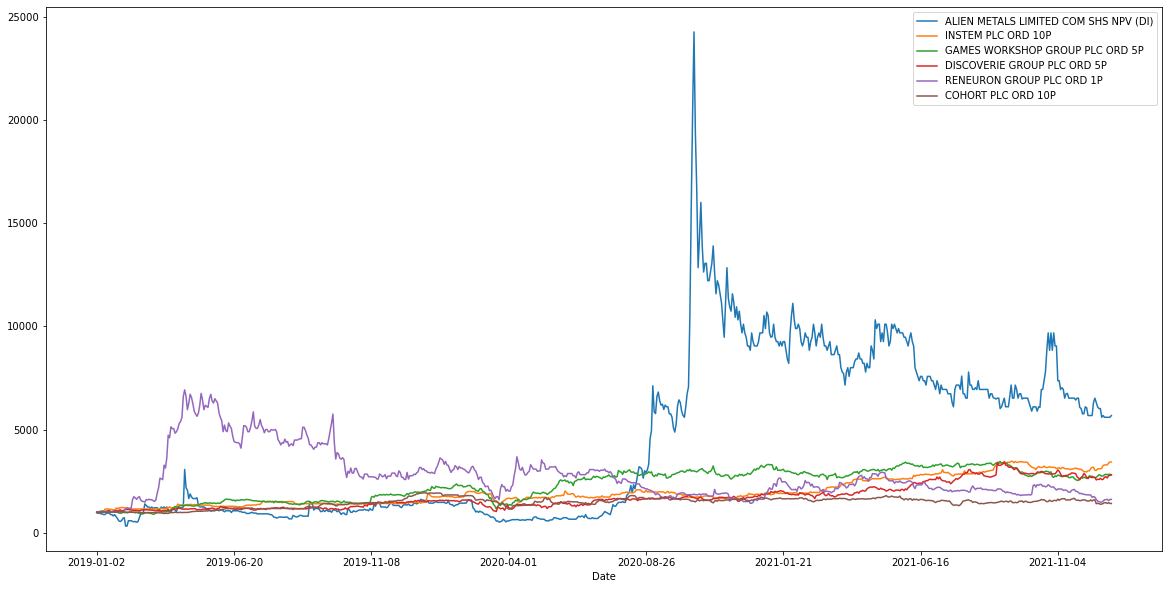

In [38]:
fm.plot_portfolio_value (gmv, risky_returns, returns_type="raw")

## Visualizing wealth index per stock with weighed returns

The plot below shows what the wealth index of the stocks included in the GMV looked like after the GMV portfolio weights were applied to them. We can see that the volatility is much lower but so are are the indexes growth.

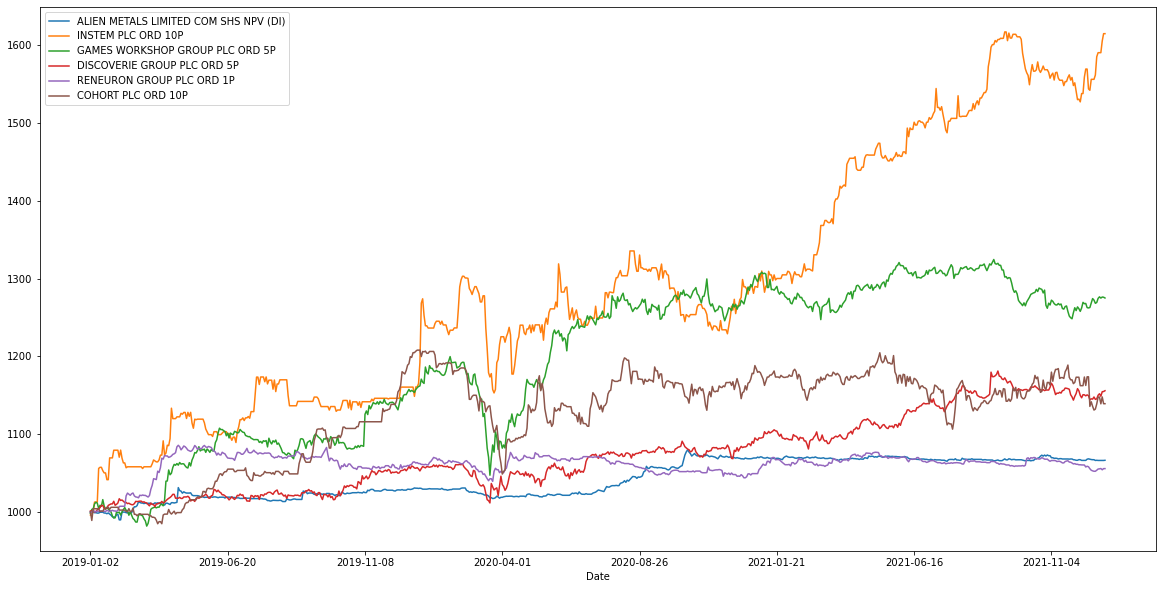

In [39]:
fm.plot_portfolio_value (gmv, risky_returns, returns_type="weighed")

## Visualizing total portfolio wealth index and a rolling average

After the weighed returns for each given stock are combined, the total portfolio wealth index would look like on the plot below. The plot also shows a rolling average.

<AxesSubplot:xlabel='Date'>

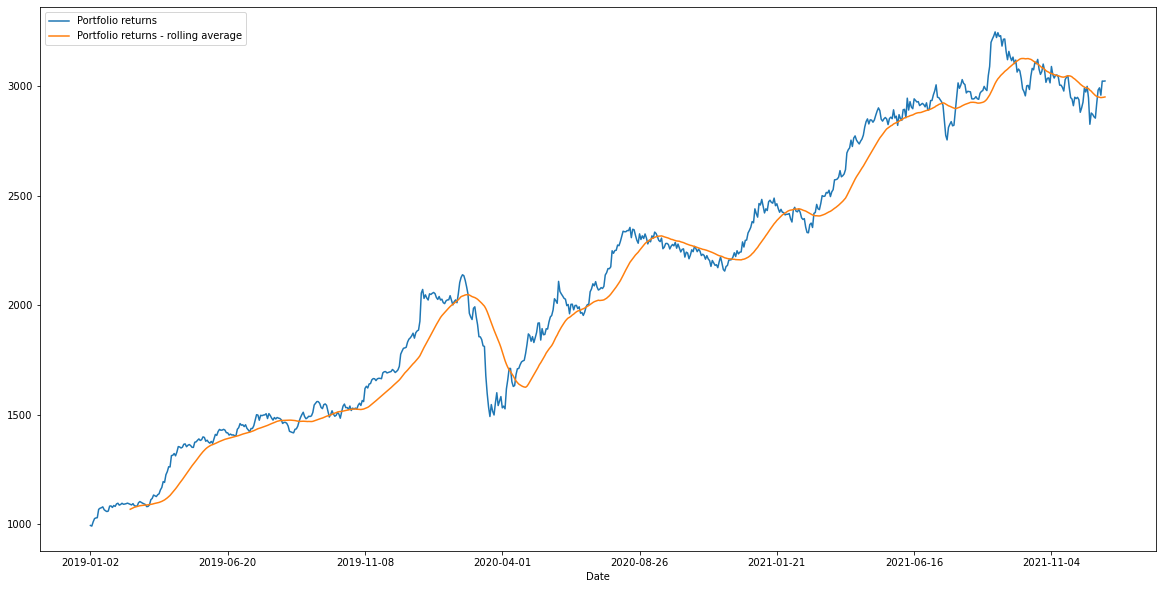

In [14]:
fm.plot_portfolio_value (gmv, risky_returns, returns_type="total", rolling_window=30)

In [15]:
weighed_returns = fm.get_portfolio_returns (gmv, risky_returns, returns_type="weighed")

## Visualizing juxtaposition or weighed returns and correlations between stock returns

This plot below exposes the limits of diversification. On one side we have the total portfolio returns and on the other side the average correlations between the individual weighed stocks comprising the portfolio. The takeaway from this plot is that when the portfolio returns go down the correlations between the weighed stocks comprising the portfolio go up. The most obvious time period is March/April 2020 when the market went down due to the COVID pandemic so all the stocks in the portfolio sustained losses at the same time.

<AxesSubplot:>

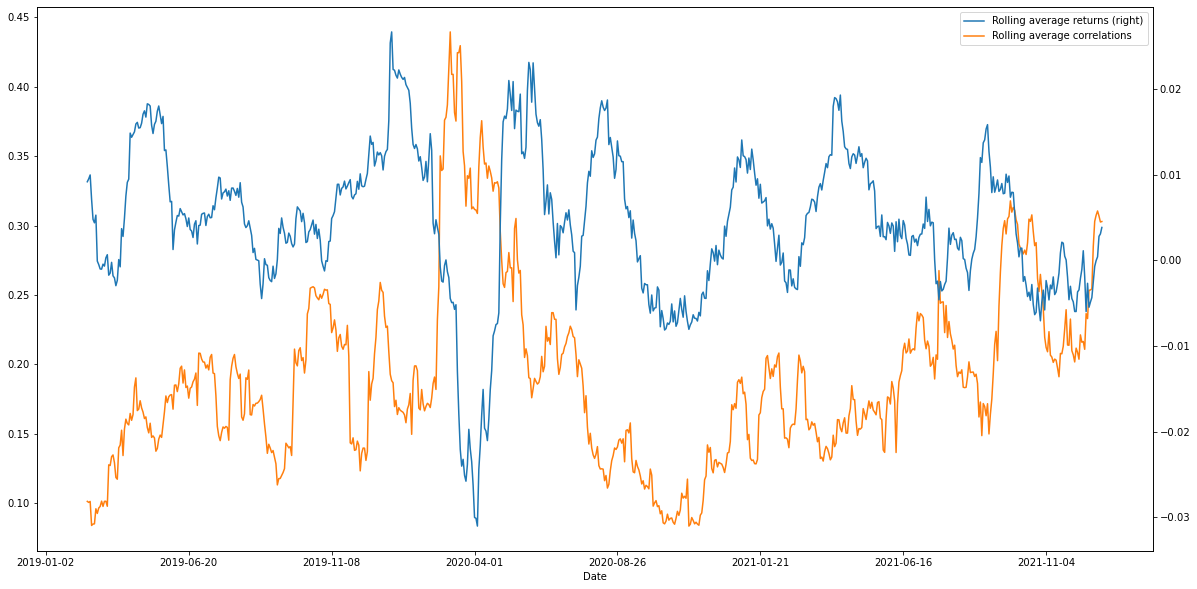

In [16]:
fm.plot_portfolio_returns_and_correlations (gmv, weighed_returns, rolling_window=30)

## Introducing Constant Proportion Portfolio Insurance (CPPI)

Constant Proportion Portfolio Insurance (CPPI) is a type of portfolio insurance in which the investor sets a floor (in this case study 80%) on the dollar value of their portfolio and max drawdown (in this case 25%), then structures asset allocation around that decision. The two asset classes used in CPPI are a risky asset(s) (stocks in this case study) and a conservative asset of either cash, equivalents or treasury bonds (in this case study a generic safe asset with a static return of 3%).

The plot below shows what the wealth index of individual stocks stocks included in the GMV portfolio would look like WITHOUT the GMV portfolio weights and without CPPI applied (dotted lines) and with CPPI applied (continuous lines). The effect of CPPI on the most volatile asset (ALIEN METALS LIMITED COM SHS NPV (DI)) is the most pronounced.

<AxesSubplot:xlabel='Date'>

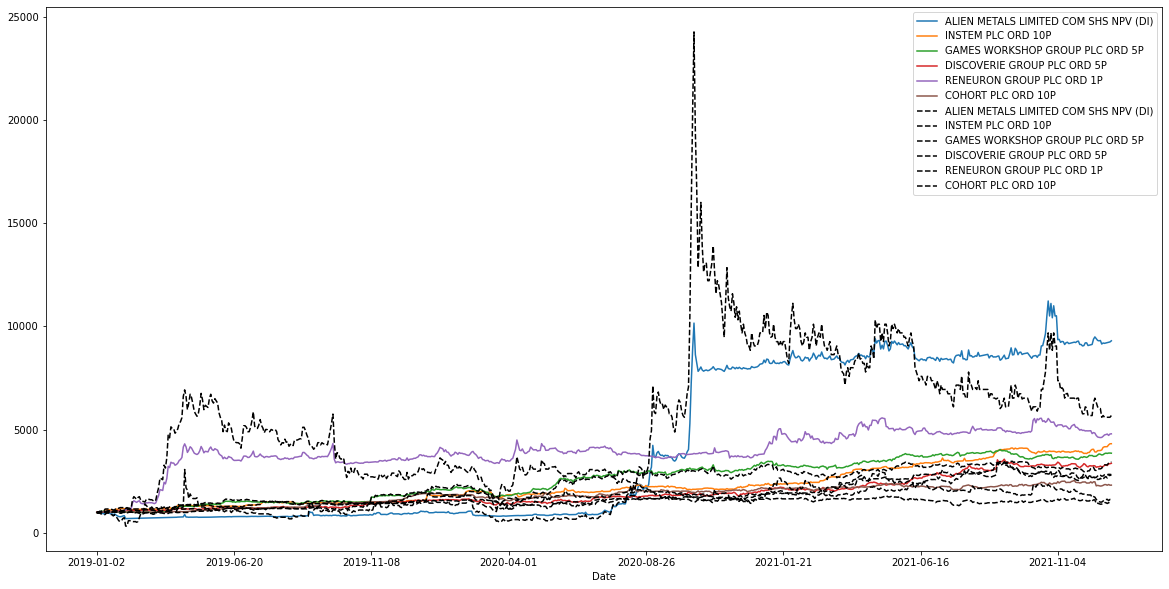

In [17]:
fm.plot_cppi_wealth (risky_returns, safe_returns=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=0.25)

The plot below shows what the wealth index of individual stocks stocks comprising the GMV portfolio would look like WITH the GMV portfolio weights and without CPPI applied (dotted lines) and with CPPI applied (continuous lines).

<AxesSubplot:xlabel='Date'>

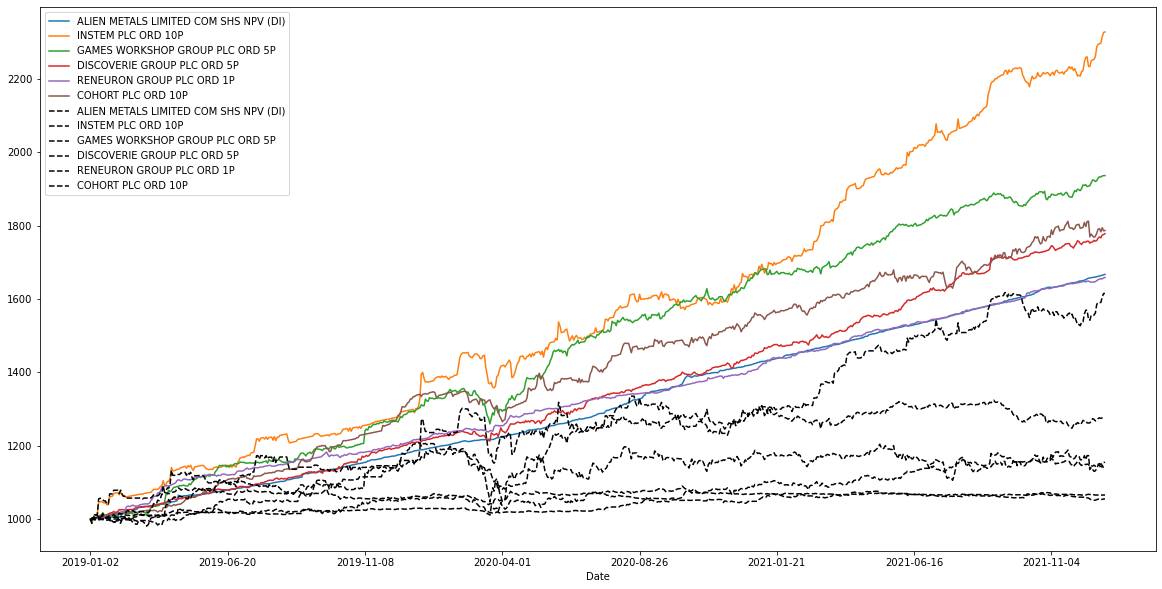

In [18]:
fm.plot_cppi_wealth (weighed_returns, safe_returns=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=0.25)

The final plot shows the total wealth index of GMV portfolio without CPPI applied (dotted line) and with CPPI applied (continuous line). The most apparent effect of CPPI on this portfolio can be seen in March/April 2022 when the market drop caused by COVID was softened and the subsequent wealth growth onwards was slightly higher than it would be without CPPI.

<AxesSubplot:xlabel='Date'>

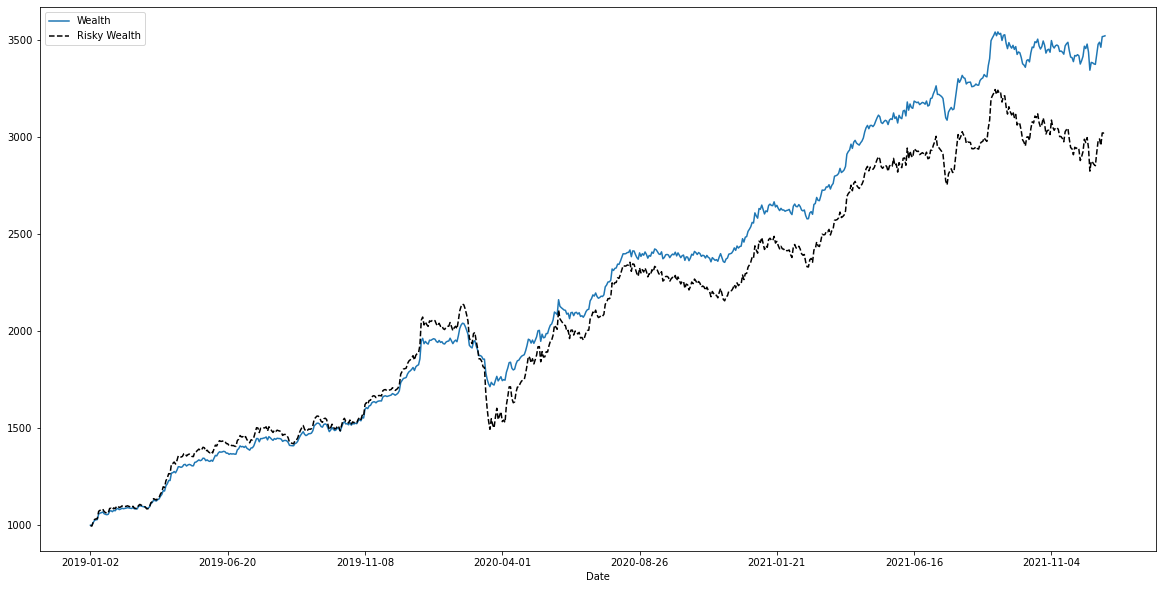

In [20]:
total_portfolio_returns = fm.get_portfolio_returns (gmv, risky_returns, returns_type="total")
fm.plot_cppi_wealth (total_portfolio_returns, safe_returns=None, m=3, start=1000, floor=0.8, riskfree_rate=0.025, drawdown=0.25)